In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import dhn_med_py
import numpy as np
from datetime import datetime

from dhn_med_py import MedSession

In [4]:
med_folderpath = r"/Users/gardy/Documents/GardyL/Data_storage/EEG_data/BIDS/BIDS_like_Toulouse/sub-073/ses-EPIFAR/ses-MedNlx01/RL41-epifar3.medd"

##### EEG duration to load #####
time_start_sec = 0
time_stop_sec = 200
n_channels_to_load = 10
##### /EEG duration to load #####

In [3]:
##### Open session #####
sess = MedSession([med_folderpath])
##### /Open session #####

##### Get headers #####
sampling_rate = sess.session_info['channels'][0]['metadata']['sampling_frequency']
print("First channel name:", sess.session_info['channels'][0]['metadata']['channel_name'])
print("Sampling rate of first channel:", sampling_rate)

for key in sess.session_info['channels'][0]['metadata'].keys():
    print(f"[{key} ]", sess.session_info['channels'][0]['metadata'][key])
##### Get headers #####
    
##### Free session #####
del sess
##### /Free session #####

First channel name: chan_0001
Sampling rate of first channel: 32768.0
[path ] /Users/gardy/Documents/GardyL/Data_storage/EEG_data/BIDS/BIDS_like_Toulouse/sub-073/ses-EPIFAR/ses-MedNlx01/RL41-epifar3.medd/chan_0001.ticd
[start_time ] 36582297030
[end_time ] 40194552037
[start_time_string ] Thu 28 Jan 2021  10:09:42.297030 CET (UTC +1.00)
[end_time_string ] Thu 28 Jan 2021  11:09:54.552037 CET (UTC +1.00)
[session_start_time ] 36582297030
[session_end_time ] 40194552037
[session_start_time_string ] Thu 28 Jan 2021  10:09:42.297030 CET (UTC +1.00)
[session_end_time_string ] Thu 28 Jan 2021  11:09:54.552037 CET (UTC +1.00)
[absolute_start_sample_number ] 0
[absolute_end_sample_number ] 118366336
[session_name ] RL41-epifar3
[channel_name ] chan_0001
[anonymized_subject_ID ] 
[session_UID ] 1701574033923764905
[channel_UID ] 12762832480109408761
[session_description ] 
From Neuralynx Raw Data (NRD) File Header:
------------------------------------------
File Type:  Raw
File Version:  3.4.0


connect_to_server_d11(): failed to connect
send_transmission_d11(): failed to open socket 72.174.93.146
freeing session
closing!


In [5]:
##### Open session #####
sess = MedSession([med_folderpath])
##### /Open session #####

##### Read data, in 1 second chunks #####
all_channels_data = []
ch_names = []
sfreq_list = []

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"Loding data... (hh:mm:ss) {current_time}")

chunks_duration_sec = 100
time_range = np.arange(time_start_sec, time_stop_sec, chunks_duration_sec)

for ch_num_i in range(n_channels_to_load):
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(f"[{current_time}] Opening channel {ch_num_i}...")

    ### Init variables for this channel
    ch_names.append(sess.session_info['channels'][ch_num_i]['metadata']['channel_name'])
    sfreq_list.append(sess.session_info['channels'][ch_num_i]['metadata']['sampling_frequency'])
    all_channels_data.append([])

    ### Load data by chunks
    for y in time_range:
        start_sec = y
        stop_sec = y + chunks_duration_sec

        sess.readByIndex(sampling_rate * start_sec, sampling_rate * stop_sec)
        all_channels_data[ch_num_i].append(sess.data['channels'][ch_num_i]['data'])
        #print(f"[Channel {ch_num_i}] {y} sec. to {y+1} sec. done.\n")
    all_channels_data[ch_num_i] = np.concatenate(all_channels_data[ch_num_i])
    print(f"Channel {ch_num_i} done.")
##### /Read data, in 1 second chunks #####

##### Free session #####
del sess
##### /Free session #####

Loding data... (hh:mm:ss) 14:50:54
[14:50:54] Opening channel 0...
Channel 0 done.
[14:50:58] Opening channel 1...
Channel 1 done.
[14:51:01] Opening channel 2...
Channel 2 done.
[14:51:04] Opening channel 3...
Channel 3 done.
[14:51:08] Opening channel 4...
Channel 4 done.
[14:51:11] Opening channel 5...
Channel 5 done.
[14:51:14] Opening channel 6...
Channel 6 done.
[14:51:18] Opening channel 7...
Channel 7 done.
[14:51:21] Opening channel 8...
Channel 8 done.
[14:51:24] Opening channel 9...
Channel 9 done.


freeing session
closing!


In [7]:
print(f"data shape: {np.array(all_channels_data).shape}")

data shape: (10, 6553600)


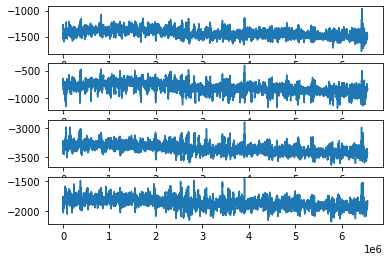

In [9]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4)
ax[0].plot(all_channels_data[0])
ax[1].plot(all_channels_data[1])
ax[2].plot(all_channels_data[2])
ax[3].plot(all_channels_data[3])
plt.show()